## Análise de Cluster
### MBA em Data Science e Analytics USP ESALQ

**Prof Dr.** Wilson Tarantin Junior

**Aluna:** Luiza Batista Laquini

**Turma:** DSA 2024-1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 

#import plotly.io as pio
#pio.renderers.default='browser'

import warnings
warnings.filterwarnings("ignore")

c:\Users\madeinweb\Documents\GitHub\unsupervised-machine-learning\.venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Leitura dos dados 
dados_vest = pd.read_excel('./vestibular.xlsx')
## Fonte: Fávero & Belfiore (2024, CapÃ­tulo 9)

# Estrutura dos dados
print(dados_vest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   5 non-null      object 
 1   matemática  5 non-null      float64
 2   física      5 non-null      float64
 3   química     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes
None


In [4]:
# Visualização da tabela
dados_vest

,estudante,matemática,física,química
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patrícia,8.9,1.0,2.7
3,Ovídio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


In [5]:
# Estatísticas descritivas das variáveis quantitativas
dados_vest.describe()
## Note que as variáveis já possuem a mesma escala (são todas notas de 0 a 10) -> não precisa normalizar

,matemática,física,química
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


In [6]:
# Gráfico 3D das observações
fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    text=dados_vest.estudante)
fig.show()

### Padronização por meio do Z-Score

Procedimento para quando as variáveis estiverem em unidades de medidas ou escalas distintas. 
Embora aqui não seja necessário (vamos provar isso), poderia ser feito da seguinte forma:


In [13]:
# Selecionando apenas variáveis quantitativas
vest = dados_vest.drop(columns=['estudante'])

# Aplicando o procedimento de ZScore
vest_pad = vest.apply(zscore, ddof=1)

# Visualizando o resultado do procedimento na média e no desvio padrão
print('Média:')
print(round(vest_pad.mean(), 2))
print('\nDesvio Padrão:')
print(round(vest_pad.std(), 2))

Média:
matemática    0.0
física        0.0
química       0.0
dtype: float64

Desvio Padrão:
matemática    1.0
física        1.0
química       1.0
dtype: float64


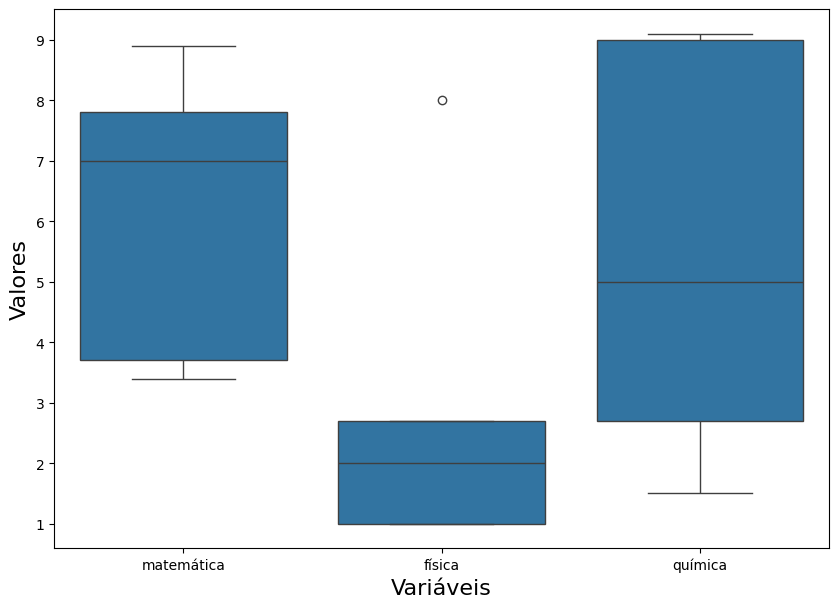

In [16]:
# Boxplot com as variáveis originais
plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(vest))
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

O gráfico ilustra que não é necessária a padronização nesse caso, pois a escala é a mesma para todas as variáveis (0 a 10)

### Clusterização pelo método Hierárquico Aglomertivo

Medida de similaridade: Distância Euclidiana<br>
Método de encadeamento: Testes com todos (*Single Linkage*, *Complete Linkage* e *Average Linkage*)

In [17]:
# Calculando as distâncias
dist_euclidiana = pdist(vest, metric='euclidean')

#### *single-linkage*

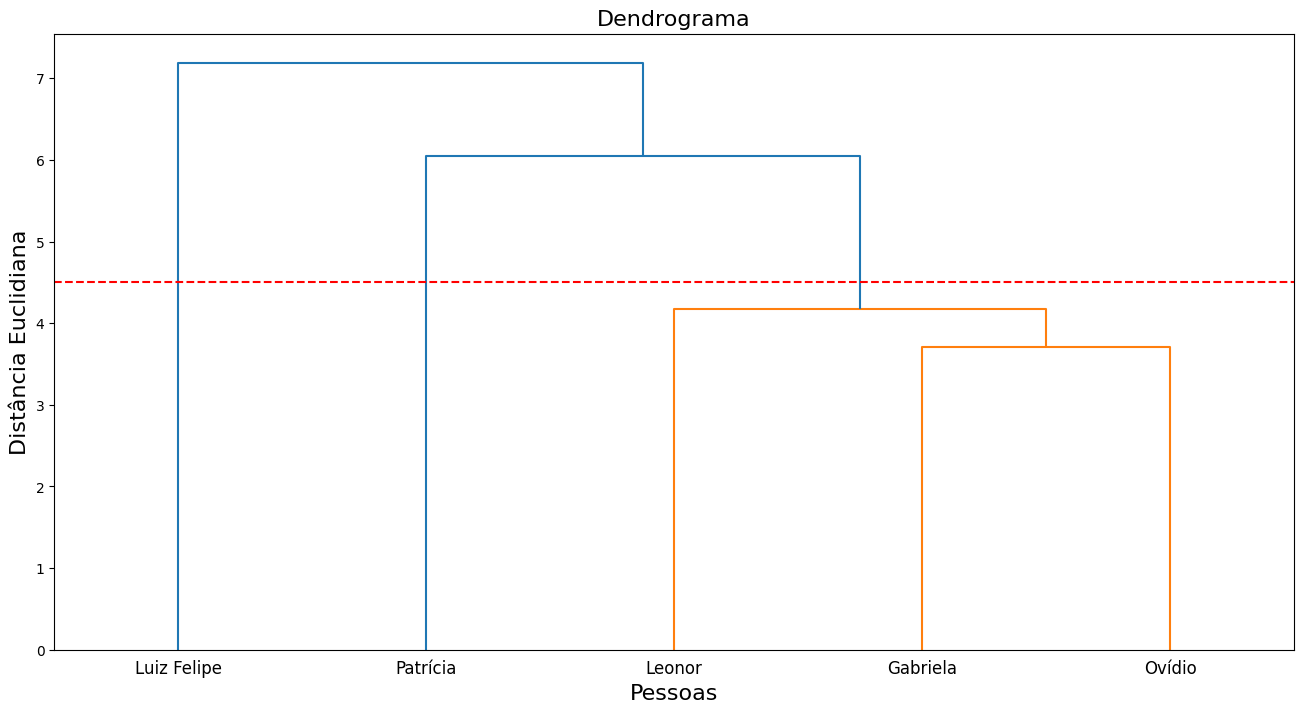

In [18]:
# Dendrograma para o método single-linkage
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(vest, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados_vest.estudante))
plt.title('Dendrograma p/ single-linkage', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

A linha em vermelho é um indicativo do número ideal de *clusters*. Observe que, por estar mais próxima do grupo em laranja (grupo com Leonor, Gabriela e Ovídeo), incluir a Patrícia no grupo seria um salto muito grande. Portanto, o dendrograma indica que o ideal é a formação de 3 *clusters*, sendo estes:<br>
1 - [Leonor, Gabriela e Ovídeo]<br>
2 - [Patrícia]<br>
3 - [Luiz Felipe]<br>

In [ ]:
# OBS!!

# Metric options:
  ## euclidean
  ## sqeuclidean
  ## cityblock
  ## chebyshev
  ## canberra
  ## correlation

# Method options:
  ## single
  ## complete
  ## average

In [19]:
# Realizando o agrupamento para 3 clusters
cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(vest)
dados_vest['cluster_single'] = indica_cluster_sing
dados_vest['cluster_single'] = dados_vest['cluster_single'].astype('category')

In [20]:
# Coeficietes obtidos
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[np.float64(3.713488925525428), np.float64(4.170131892398609), np.float64(6.044832503882965), np.float64(7.1867934435323795)]


#### *complete-linkage*

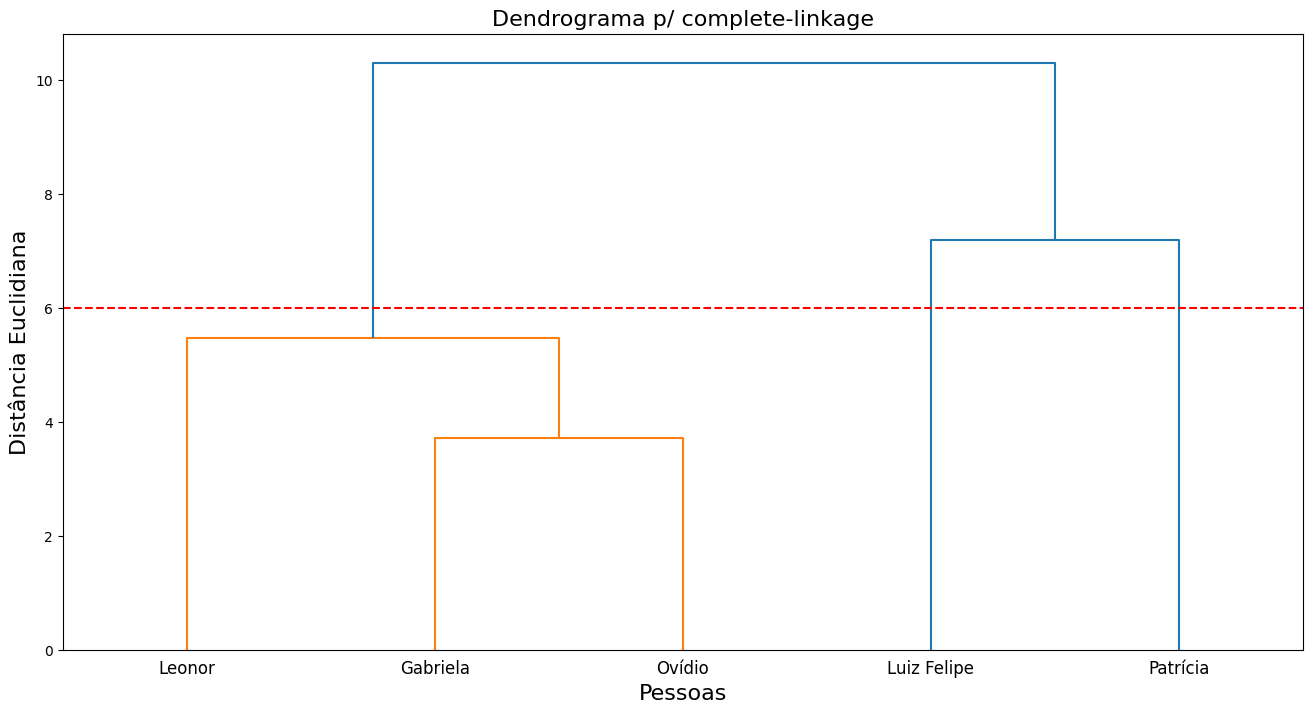

In [23]:
# Dendrograma para método complete-linkage
plt.figure(figsize=(16,8))
dend_compl = sch.linkage(vest, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma p/ complete-linkage', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

Resultado análogo ao método single

In [ ]:
# Realizando o agrupamento para 3 clusters
cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(vest)
dados_vest['cluster_complete'] = indica_cluster_comp
dados_vest['cluster_complete'] = dados_vest['cluster_complete'].astype('category')

In [22]:
# Coeficientes obtidos
coef_complete = [y[1] for y in dendrogram_c['dcoord']]
print(coef_complete)

[np.float64(3.713488925525428), np.float64(5.473572873361603), np.float64(7.1867934435323795), np.float64(10.290286682109492)]


#### *average-linkage*

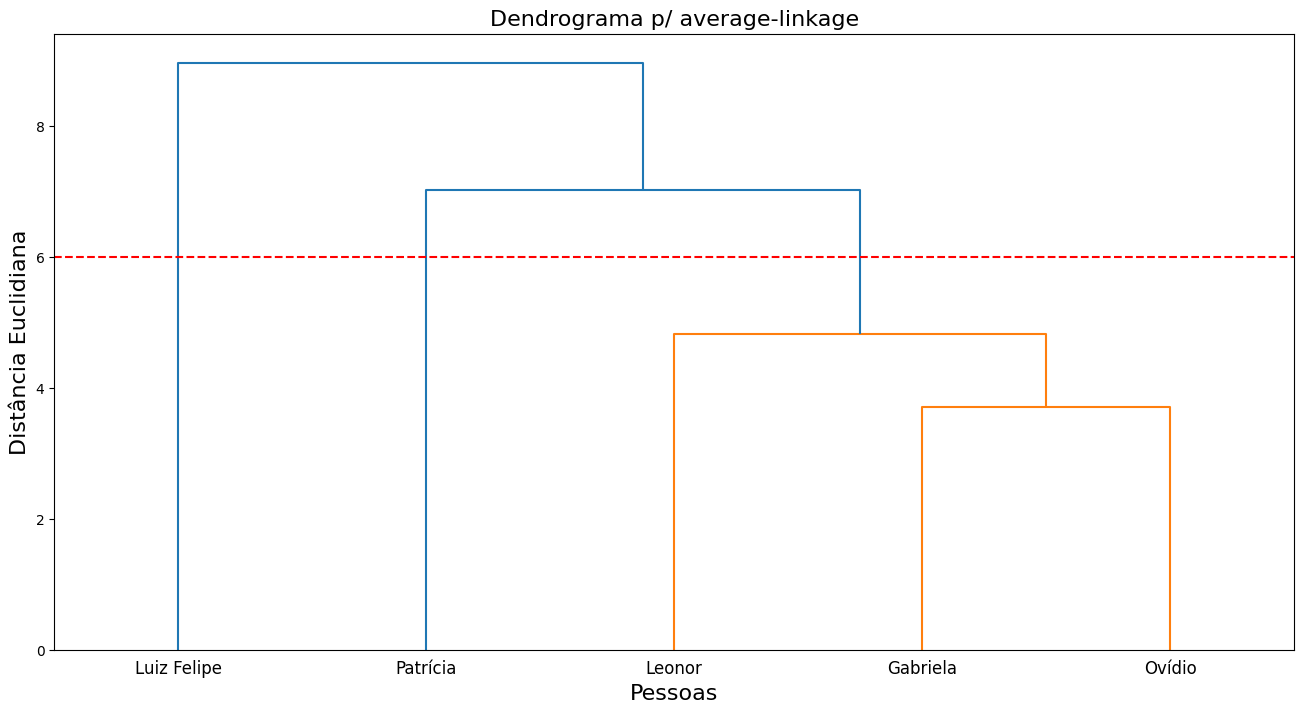

In [25]:
# Dendrograma para método average-linkage
plt.figure(figsize=(16,8))
dend_avg = sch.linkage(vest, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma p/ average-linkage', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

Resultado análogo ao complete e ao single

In [26]:
# Realizando o agrupamento para 3 clusters
cluster_avg = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(vest)
dados_vest['cluster_average'] = indica_cluster_avg
dados_vest['cluster_average'] = dados_vest['cluster_average'].astype('category')

In [27]:
# Coeficientes obtidos
coef_avg = [y[1] for y in dendrogram_a['dcoord']]
print(coef_avg)

[np.float64(3.713488925525428), np.float64(4.821852382880106), np.float64(7.014908666114838), np.float64(8.957934317775708)]


### Clusterização pelo Método K-MEANS

In [29]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica
kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(vest)

# Coluna para identificação dos clusters
kmeans_clusters = kmeans.labels_
dados_vest['cluster_kmeans'] = kmeans_clusters
dados_vest['cluster_kmeans'] = dados_vest['cluster_kmeans'].astype('category')

# Visualização
dados_vest

,estudante,matemática,física,química,cluster_single,cluster_average,cluster_kmeans
0,Gabriela,3.7,2.7,9.1,0,0,2
1,Luiz Felipe,7.8,8.0,1.5,1,1,1
2,Patrícia,8.9,1.0,2.7,2,2,0
3,Ovídio,7.0,1.0,9.0,0,0,2
4,Leonor,3.4,2.0,5.0,0,0,2


In [30]:
# Coordenadas dos centróides nos clusters finais
cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = vest.columns
cent_finais.index.name = 'cluster'
cent_finais

,matemática,física,química
cluster,,,
0,8.9,1.0,2.7
1,7.8,8.0,1.5
2,4.7,1.9,7.7


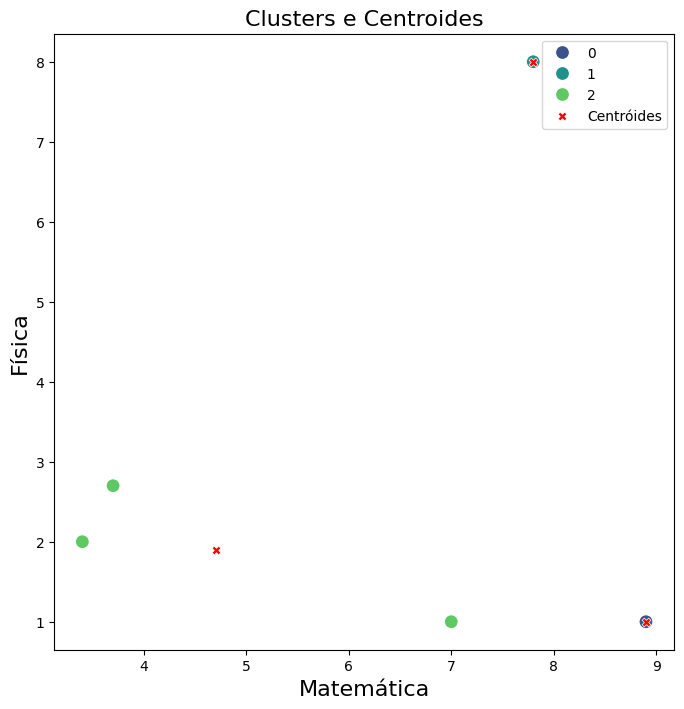

In [32]:
# Plotando as observações e seus centroides
plt.figure(figsize=(8,8))
sns.scatterplot(data=dados_vest, x='matemática', y='física', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='matemática', y='física', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

In [39]:
# Gráfico 3D dos clusters
fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    color='cluster_kmeans',
                    text=dados_vest.estudante)
fig.show()

#### Método Elbow (cotovelo)

Vamos comparar ao método Elbow para identificação do nº de clusters:<br>
- Elaborado com base na "WCSS": distância de cada observação para o centróide de seu cluster<br>
- Quanto mais próximos entre si e do centroide, menores as distâncias internas<br>
- Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra" e os ganhos deixam de ser significativos

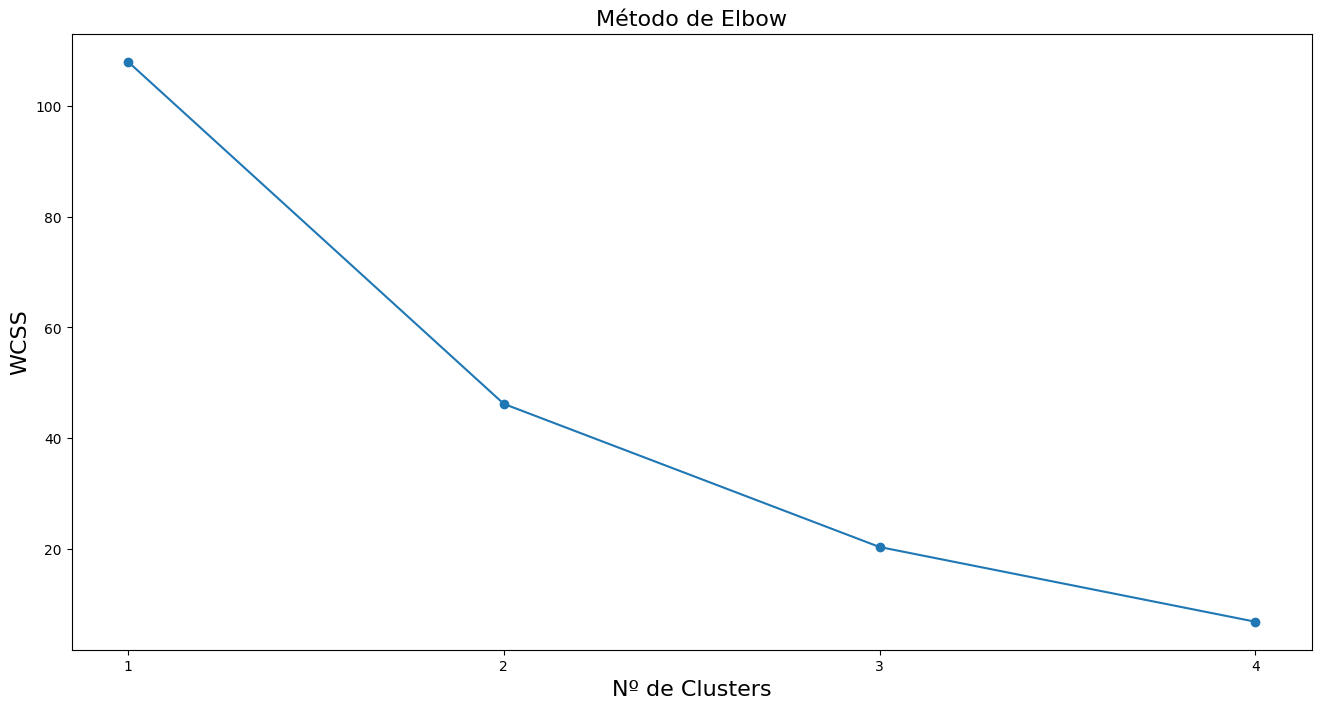

In [34]:
# Gráfico do cotovelo
elbow = []
K = range(1,5) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(vest)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº de Clusters', fontsize=16)
plt.xticks(range(1,5))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

De fato, 3 clusters é o mais indicado.

### Análise de variância de um fator (ANOVA)

Interpretação do output:

 cluster_kmeans MS: indica a variabilidade entre grupos (inter)<br>
 Within MS: indica a variabilidade dentro dos grupos (intra)<br>
 F: estatí­stica de teste (cluster_kmeans MS / Within MS)<br>
 p-unc: p-valor da estatí­stica F<br>
 se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais 
 (rejeição da hipótese nula -> a clusterização é adequada)

**Matemática**

In [35]:
pg.anova(dv='matemática', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,16.592,7.98
DF,2,2
MS,8.296,3.99
F,2.079198,NaN
p-unc,0.32476,NaN
np2,0.67524,NaN


**Física**

In [36]:
pg.anova(dv='física', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,32.612,1.46
DF,2,2
MS,16.306,0.73
F,22.336986,NaN
p-unc,0.04285,NaN
np2,0.95715,NaN


**Química**

In [37]:
pg.anova(dv='química', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,38.352,10.94
DF,2,2
MS,19.176,5.47
F,3.505667,NaN
p-unc,0.221943,NaN
np2,0.778057,NaN


A variável mais discriminante contém a maior estatística F (é significativa).<br>
O valor da estatística F é sensível ao tamanho da amostra.